In [57]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("./athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [58]:
df['Team'].unique().size

1184

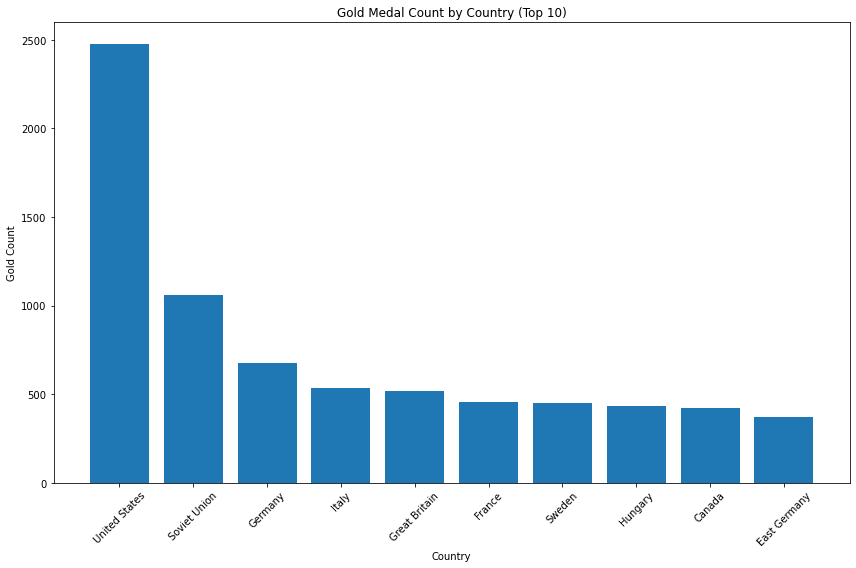

In [59]:
gold_rows = df.loc[df['Medal'] == 'Gold'].copy()
gold_rows['count'] = 1
gold_result = gold_rows.groupby('Team').count()['count'].sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(gold_result.index, gold_result.values)
ax.set_xlabel('Country')
ax.set_ylabel('Gold Count')
ax.set_title('Gold Medal Count by Country (Top 10)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

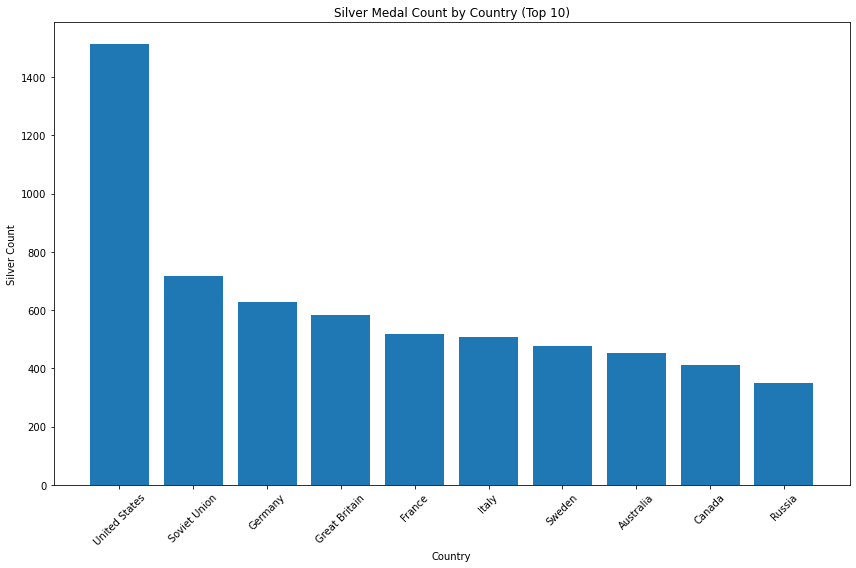

In [60]:
gold_rows = df.loc[df['Medal'] == 'Silver'].copy()
gold_rows['count'] = 1
gold_result = gold_rows.groupby('Team').count()['count'].sort_values(ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(gold_result.index, gold_result.values)
ax.set_xlabel('Country')
ax.set_ylabel('Silver Count')
ax.set_title('Silver Medal Count by Country (Top 10)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

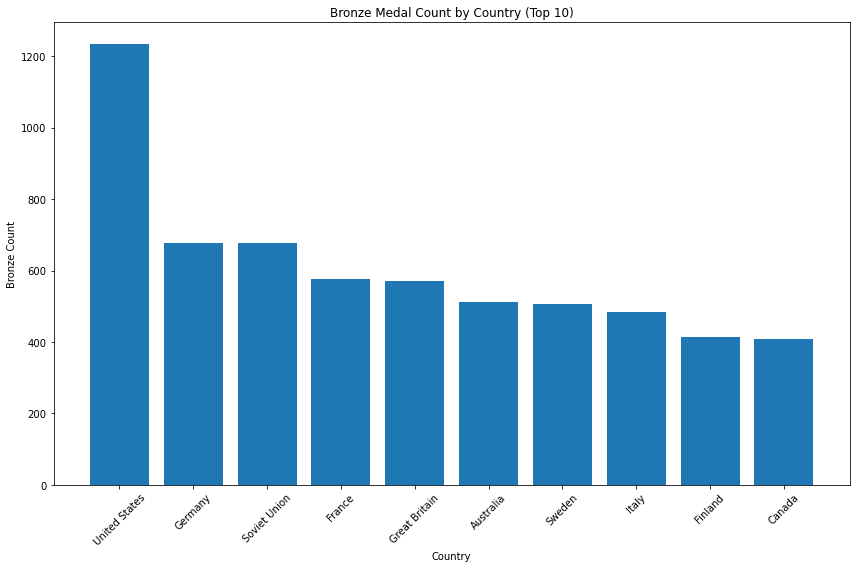

In [61]:
gold_rows = df.loc[df['Medal'] == 'Bronze'].copy()
gold_rows['count'] = 1
gold_result = gold_rows.groupby('Team').count()['count'].sort_values(ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(gold_result.index, gold_result.values)
ax.set_xlabel('Country')
ax.set_ylabel('Bronze Count')
ax.set_title('Bronze Medal Count by Country (Top 10)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

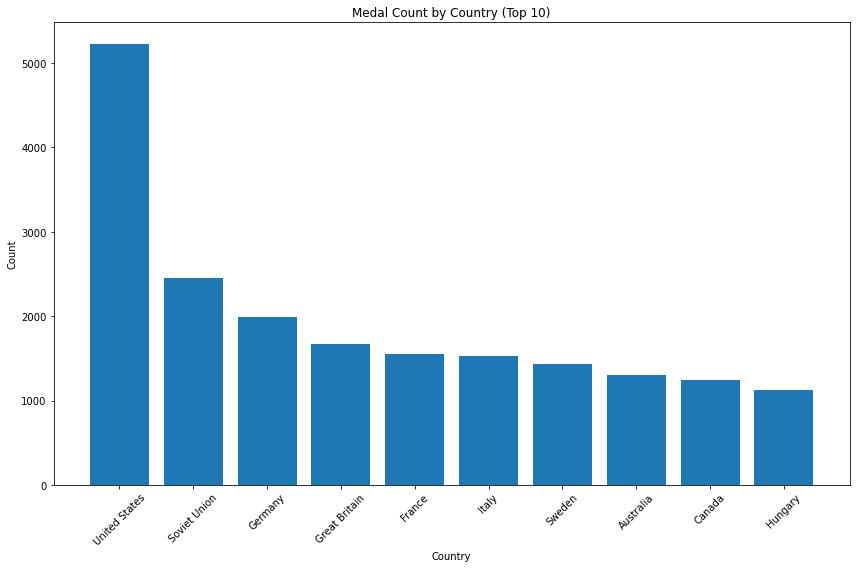

In [62]:

total = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
result = total['Team'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(result.index, result.values)

ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Medal Count by Country (Top 10)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

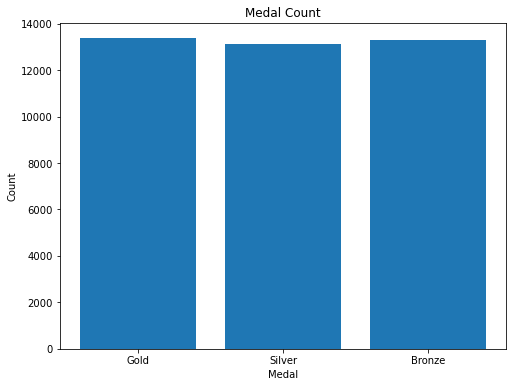

In [63]:
gold_count = df[df['Medal'] == 'Gold'].shape[0]
silver_count = df[df['Medal'] == 'Silver'].shape[0]
bronze_count = df[df['Medal'] == 'Bronze'].shape[0]

# Plotting
categories = ['Gold', 'Silver', 'Bronze']
counts = [gold_count, silver_count, bronze_count]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(categories, counts)

ax.set_xlabel('Medal')
ax.set_ylabel('Count')
ax.set_title('Medal Count')

plt.show()

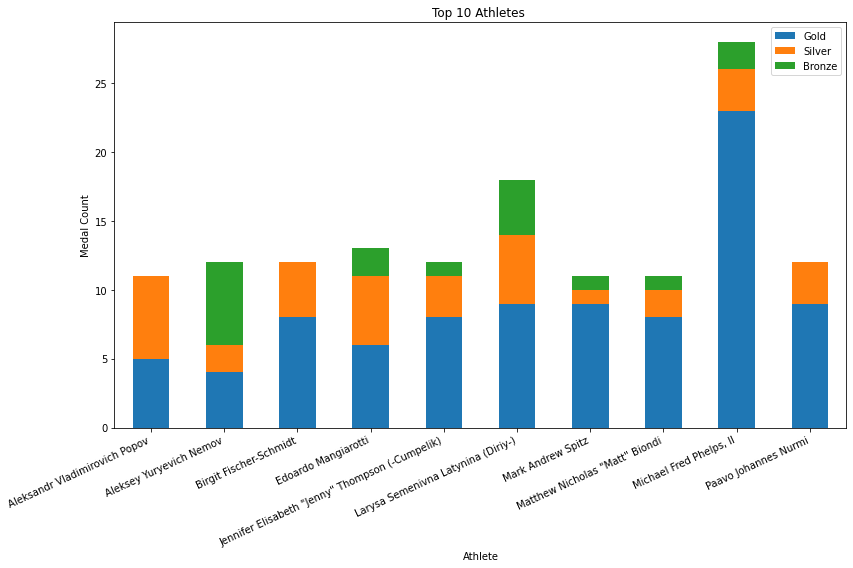

In [64]:
gold_top10 = df[df['Medal'] == 'Gold']['Name'].value_counts().head(10).sort_values(ascending=False)

silver_top10 = df[df['Medal'] == 'Silver']['Name'].value_counts().head(10).sort_values(ascending=False)

bronze_top10 = df[df['Medal'] == 'Bronze']['Name'].value_counts().head(10).sort_values(ascending=False)

top10_athletes = set(gold_top10.index) | set(silver_top10.index) | set(bronze_top10.index)

top10_df = df[df['Name'].isin(top10_athletes)]

athlete_medal_counts = top10_df.groupby(['Name', 'Medal']).size().unstack().fillna(0)

athlete_medal_counts['Total'] = athlete_medal_counts.sum(axis=1)

top10_athletes_total = athlete_medal_counts['Total'].nlargest(10).index.sort_values(ascending=False)

top10_df_total = top10_df[top10_df['Name'].isin(top10_athletes_total)]

athlete_medal_counts_total = top10_df_total.groupby(['Name', 'Medal']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(12, 8))

athlete_medal_counts_total[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Athlete')
ax.set_ylabel('Medal Count')
ax.set_title('Top 10 Athletes ')

plt.xticks(rotation=25)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

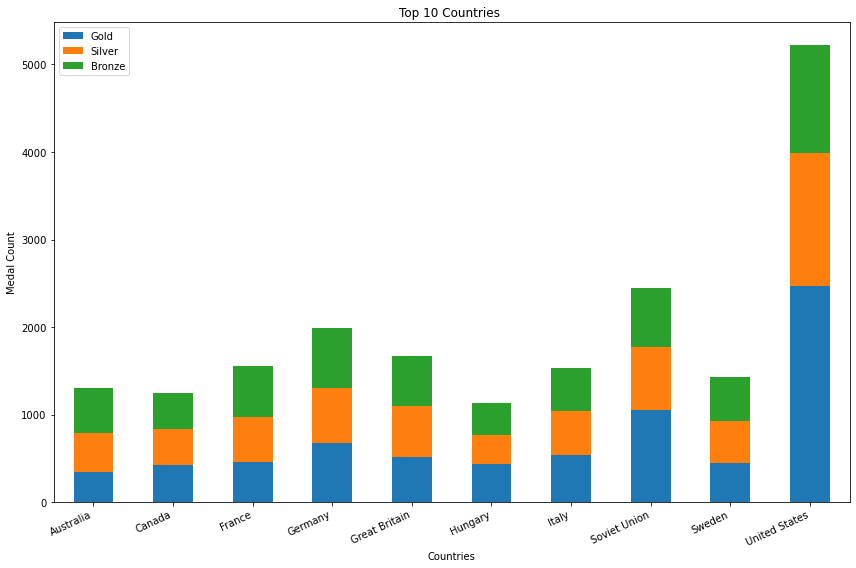

In [65]:
gold_top10 = df[df['Medal'] == 'Gold']['Team'].value_counts().head(10).sort_values(ascending=False)

silver_top10 = df[df['Medal'] == 'Silver']['Team'].value_counts().head(10).sort_values(ascending=False)

bronze_top10 = df[df['Medal'] == 'Bronze']['Team'].value_counts().head(10).sort_values(ascending=False)

top10_athletes = set(gold_top10.index) | set(silver_top10.index) | set(bronze_top10.index)

top10_df = df[df['Team'].isin(top10_athletes)]

athlete_medal_counts = top10_df.groupby(['Team', 'Medal']).size().unstack().fillna(0)

athlete_medal_counts['Total'] = athlete_medal_counts.sum(axis=1)

top10_athletes_total = athlete_medal_counts['Total'].nlargest(10).index.sort_values(ascending=False)

top10_df_total = top10_df[top10_df['Team'].isin(top10_athletes_total)]

athlete_medal_counts_total = top10_df_total.groupby(['Team', 'Medal']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(12, 8))

athlete_medal_counts_total[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Countries')
ax.set_ylabel('Medal Count')
ax.set_title('Top 10 Countries ')

plt.xticks(rotation=25)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()